In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Any

from sympy import init_printing

init_printing()

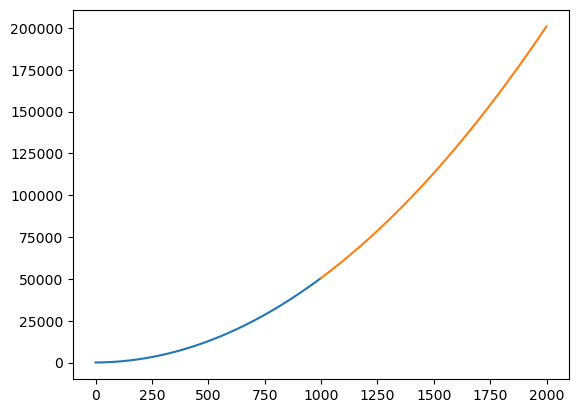

In [5]:
from modules.extra import poly_fit

data_model: Callable[..., Any] = lambda x: 20 + 0.5 * x + 0.05 * x**2
train_data: np.ndarray = np.arange(0, 1000)
with np.nditer(train_data, op_flags=["readwrite"]) as it:
    for value in it:
        value[...] = data_model(value)

predicted_data: np.ndarray = poly_fit(train_data, 3, pred_start=1000, pred_length=1000)
plt.plot(np.arange(0, 1000), train_data)
plt.plot(np.arange(1000, 2000), predicted_data)

In [6]:
from IPython.display import Math
from sympy import init_printing
from modules.classes import Model, Polynomial

raw1 = "c0 + c1*t + c2*t**2 + c3*t**3"
raw2 = "a0 + a1*t + a2*exp(a3*t)"
raw3 = "a0 + a1*t + a2*t**3 + a3*cos(a4*t)"
raw4 = "a0 + a1*t + a2*sin(a3*t) + a4*cos(a5*t)"
raw5 = "a0*sin(a1*t) + a2*cos(a1*t)"

init_printing()

model1 = Model(raw1, "t")
display(model1.spectrum())
model2 = Model(raw2, "t")
display(model2.spectrum(3))
model3 = Model(raw3, "t")
display(model3.spectrum(3))
model4 = Model(raw4, "t")
display(model4.spectrum(3))
model5 = Model(raw5, "t")
display(model5.spectrum())

poly = Polynomial(len(model4.coeffs))
display(poly.spectrum())

'Train:'

Poly RSE 0.0413970706377916
Poly Rsq 0.9999923139381875
Poly Rsq 14.930496163072059
Nonline RSE 0.03578431208019327
Nonline Rsq 0.9999942587559635
Nonline Std 14.93297146705143


'Test:'

Poly RSE 9.602632802689117
Poly Rsq 0.9325383766132692
Poly Rsq 36.96736490212348
Nonline RSE 0.73216294156455
Nonline Rsq 0.9997094977826105
Nonline Std 42.95261246542686


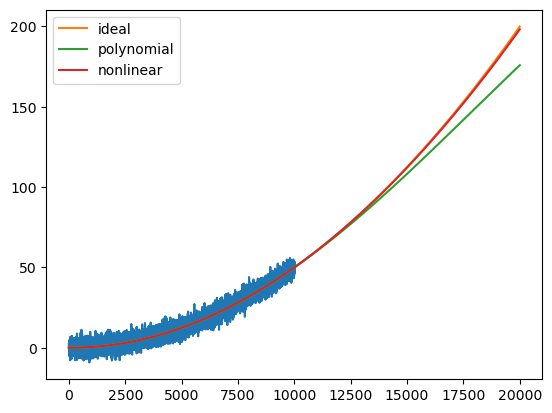

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from modules import Model, nonline_fit, poly_fit, apply_noise, exponential1, rse, r_sq

n = 10000
N = n * 2
x = np.arange(n)
l = np.arange(N)
data_train = apply_noise(exponential1(n), sigma=3)
ideal = exponential1(N)

display(Model("a0 + a1*t + a2*exp(a3*t)", "t").spectrum(6))

y_p = poly_fit(data_train, 4, pred_length=N)
y_n = nonline_fit(
    "a0 + a1*t + a2*exp(a3*t)", "t", data_train, pred_length=N, rank=4, numeric=False
)

display("Train:")
print(f"Poly RSE {rse(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {r_sq(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {np.std(y_p[0:n])}")
print(f"Nonline RSE {rse(ideal[0:n], y_n[0:n])}")
print(f"Nonline Rsq {r_sq(ideal[0:n], y_n[0:n])}")
print(f"Nonline Std {np.std(y_n[0:n])}")
display("Test:")
print(f"Poly RSE {rse(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {r_sq(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {np.std(y_p[n:N])}")
print(f"Nonline RSE {rse(ideal[n:N], y_n[n:N])}")
print(f"Nonline Rsq {r_sq(ideal[n:N], y_n[n:N])}")
print(f"Nonline Std {np.std(y_n[n:N])}")

plt.plot(x, data_train)
plt.plot(l, ideal, label="ideal")
plt.plot(l, y_p, label="polynomial")
plt.plot(l, y_n, label="nonlinear")
plt.legend()
plt.show()

<lambdifygenerated-17>:2: RuntimeWarning: overflow encountered in exp
  return a0 + a1*t + a2*exp(a3*t)
<lambdifygenerated-17>:2: RuntimeWarning: overflow encountered in multiply
  return a0 + a1*t + a2*exp(a3*t)


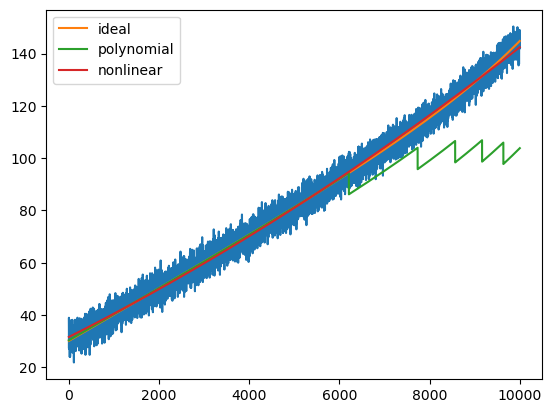

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from modules import Model, nonline_fit, Polynomial, apply_noise, exponential2

n = 10000
N = n * 2
x = np.arange(n)
l = np.arange(n)
data_train = apply_noise(exponential2(n, c1=0.1, c2=0.0005), sigma=3)
ideal = exponential2(n, c1=0.1, c2=0.0005)

# display(Model("a0 + a1*t + a2*exp(a3*t)", "t").spectrum(8))

# y_p = poly_fit(data_train, 4, pred_length=n)
nonline, poly = nonline_fit("a0 + a1*t + a2*exp(a3*t)", "t", data_train, pred_length=n, rank=6, as_model=True, numeric=True)
y_p = poly.collapse(x) 
y_n = nonline.collapse(x)


plt.plot(x, data_train)
plt.plot(l, ideal, label="ideal")
plt.plot(l, y_p, label="polynomial")
plt.plot(l, y_n, label="nonlinear")
plt.legend()
plt.show()

[a2, H*a0*a1, -H**2*a1**2*a2/2]

'Train:'

Poly RSE 0.18528519280548172
Poly Rsq 0.9831435249334751
Poly Rsq 1.424805967149932
Nonline RSE 0.06404648214757193
Nonline Rsq 0.9980174457467804
Nonline Std 1.4360882632699121


'Test:'

Poly RSE 6.491923157787834
Poly Rsq -10.029073735659793
Poly Rsq 1.9516513812817737
Nonline RSE 0.23255230322869205
Nonline Rsq 0.9740789248874613
Nonline Std 1.4420905558879933


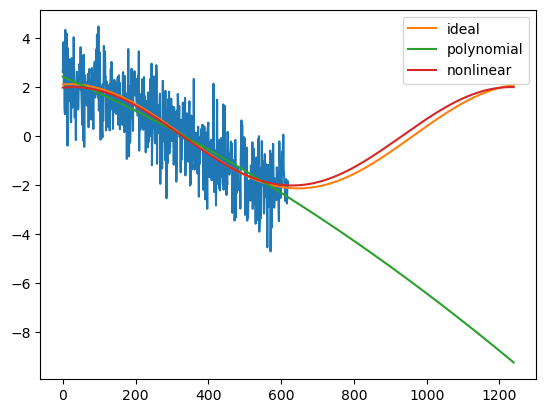

In [ ]:
from modules import transcendental1, nonline_fit, apply_noise, rse, r_sq
import numpy as np
import matplotlib.pyplot as plt

n = 620
N = n * 2
x = np.arange(n)
l = np.arange(N)
ideal = transcendental1(n)
data = apply_noise(ideal, sigma=1)
ideal = transcendental1(N)

# y_p = poly_fit(data2, 3, pred_length=N)
nonline, poly = nonline_fit(
    "a0*sin(a1*t) + a2*cos(a1*t)", "t", data, pred_length=N, as_model=True, numeric=True
)
y_p = poly.collapse(l)
y_n = nonline.collapse(l)
display(nonline.spectrum())

display("Train:")
print(f"Poly RSE {rse(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {r_sq(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {np.std(y_p[0:n])}")
print(f"Nonline RSE {rse(ideal[0:n], y_n[0:n])}")
print(f"Nonline Rsq {r_sq(ideal[0:n], y_n[0:n])}")
print(f"Nonline Std {np.std(y_n[0:n])}")
display("Test:")
print(f"Poly RSE {rse(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {r_sq(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {np.std(y_p[n:N])}")
print(f"Nonline RSE {rse(ideal[n:N], y_n[n:N])}")
print(f"Nonline Rsq {r_sq(ideal[n:N], y_n[n:N])}")
print(f"Nonline Std {np.std(y_n[n:N])}")

plt.plot(x, data)
plt.plot(l, ideal, label="ideal")
plt.plot(l, y_p, label="polynomial")
plt.plot(l, y_n, label="nonlinear")
plt.legend()
plt.show()

'Train:'

Poly RSE 0.15546639012454627
Poly Rsq 0.9867274216516794
Poly Rsq 1.3463859862952698
Nonline RSE 0.9838272885055664
Nonline Rsq -0.7823156614468414
Nonline Std 0.7352537865642922


'Test:'

Poly RSE 2.9885481704325274
Poly Rsq 0.17644942059018032
Poly Rsq 3.2856843471134822
Nonline RSE 55.93074734941562
Nonline Rsq -0.8921194771860668
Nonline Std 40.56832355480129


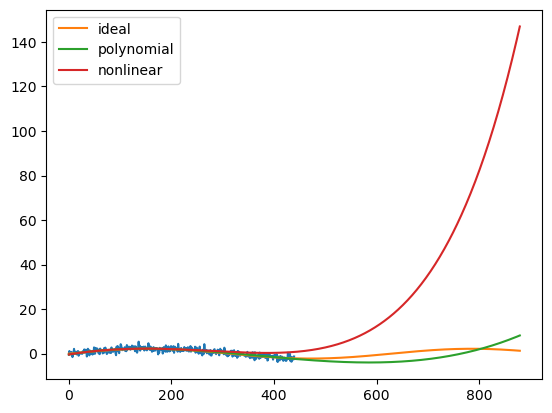

In [ ]:
import numpy as np
from modules import Polynomial, Model, apply_noise, nonline_fit, poly_fit
import matplotlib.pyplot as plt

from sympy import init_printing

from modules.utils import r_sq, rse

init_printing()


def data_model(val: int):
    return 2.2 * np.sin(0.01 * val)


n = 440
N = n * 2

x = np.arange(n)
l = np.arange(N)
ideal = np.zeros(N)
for i in np.nditer(l):
    ideal[i] = data_model(i)

data_train = apply_noise(ideal[:n], sigma=1)

expr = "a0 + a1*t**2 + a2*sin(a3*t)"
nonline, poly = nonline_fit(expr, "t", data_train, as_model=True)

display(nonline.spectrum())
display(nonline.coeffs_trained)
y_n = nonline.collapse(l)
y_p = poly.collapse(l)

display("Train:")
print(f"Poly RSE {rse(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {r_sq(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {np.std(y_p[0:n])}")
print(f"Nonline RSE {rse(ideal[0:n], y_n[0:n])}")
print(f"Nonline Rsq {r_sq(ideal[0:n], y_n[0:n])}")
print(f"Nonline Std {np.std(y_n[0:n])}")
display("Test:")
print(f"Poly RSE {rse(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {r_sq(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {np.std(y_p[n:N])}")
print(f"Nonline RSE {rse(ideal[n:N], y_n[n:N])}")
print(f"Nonline Rsq {r_sq(ideal[n:N], y_n[n:N])}")
print(f"Nonline Std {np.std(y_n[n:N])}")

plt.plot(x, data_train)
plt.plot(l, ideal, label="ideal")
plt.plot(l, y_p, label="polynomial")
plt.plot(l, y_n, label="nonlinear")
plt.legend()
plt.show()

[19.79317414 -1.87963736  0.09838109]
0.09272933502513923
0.08143672072839084


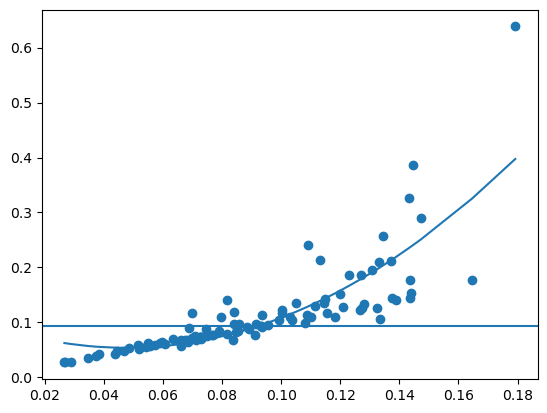

[-546.88011613 1095.72720312 -547.84707521]
0.9999781120911304
7.382928132372354e-05


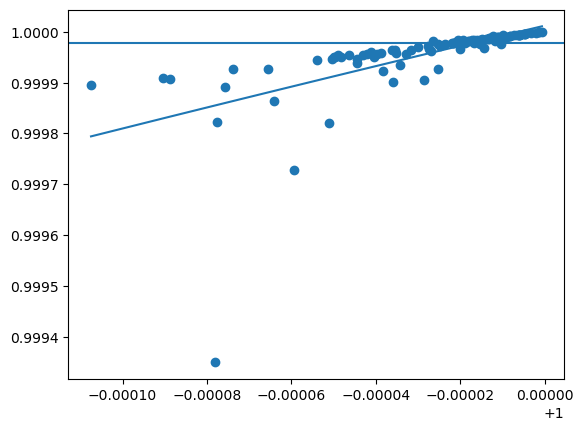

In [ ]:
import numpy as np
from modules import Polynomial, Model, apply_noise, nonline_fit, poly_fit, exponential1
import matplotlib.pyplot as plt

from sympy import init_printing

from modules.utils import concord, r_sq, rse

init_printing()


def data_model(val: int):
    return 2.2 * np.sin(0.01 * val)


p = 100
n = 10000
N = n * 2

p_rsq = np.zeros(p)
p_rse = np.zeros(p)
n_rsq = np.zeros(p)
n_rse = np.zeros(p)

for j in range(p):
    x = np.arange(n)
    ideal = exponential1()
    # ideal = np.zeros(n)
    # for i in np.nditer(x):
    #     ideal[i] = data_model(i)

    data_train = apply_noise(ideal, sigma=5)

    # expr = "a0 + a1*t**2 + a2*sin(a3*t)"
    expr = "a0 + a1*t + a2*exp(a3*t)"
    nonline, poly = nonline_fit(expr, "t", data_train, as_model=True)
    y_n = nonline.collapse(x)
    y_p = poly.collapse(x)

    p_rsq[j] = concord(ideal, y_p)
    p_rse[j] = rse(ideal, y_p)
    n_rsq[j] = concord(ideal, y_n)
    n_rse[j] = rse(ideal, y_n)

plt.scatter(p_rse, n_rse)
coeffs = np.polyfit(p_rse, n_rse, 2)
print(coeffs)
print(np.median(n_rse))
print(np.std(n_rse))
plt.plot(np.sort(p_rse), np.poly1d(coeffs)(np.sort(p_rse)))
plt.axhline(np.median(n_rse))
plt.show()
plt.scatter(p_rsq, n_rsq)
coeffs = np.polyfit(p_rsq, n_rsq, 2)
print(coeffs)
print(np.median(n_rsq))
print(np.std(n_rsq))
plt.plot(np.sort(p_rsq), np.poly1d(coeffs)(np.sort(p_rsq)))
plt.axhline(np.median(n_rsq))
plt.show()

[-3398.25455479  1903.02886073  -264.46502559]
1.908993382147047
0.02521976516012055


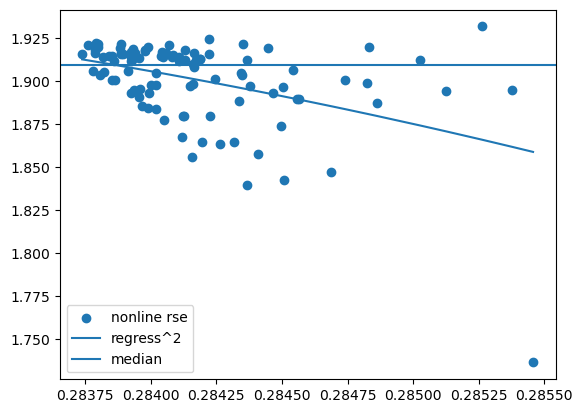

[-10265.55772774  19963.23439287  -9705.14648849]
0.39246164000533645
0.03584614007298628


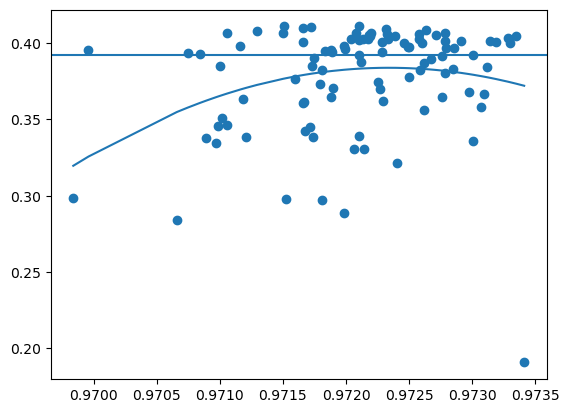

In [ ]:
import numpy as np
from modules import apply_noise, nonline_fit, concord, rse
import matplotlib.pyplot as plt

from sympy import init_printing

init_printing()


def data_model(val: int):
    return 2.2 * np.sin(0.01 * val)


p = 100
n = 440
N = n * 2

p_rsq = np.zeros(p)
p_rse = np.zeros(p)
n_rsq = np.zeros(p)
n_rse = np.zeros(p)

for j in range(p):
    x = np.arange(n)
    # ideal = exponential1()
    ideal = np.zeros(n)
    for i in np.nditer(x):
        ideal[i] = data_model(i)

    data_train = apply_noise(ideal, sigma=0.2)

    expr = "a0*sin(a1*t) + a2*cos(a1*t)"
    # expr = "a0 + a1*t + a2*exp(a3*t)"
    # y_p = poly_fit(data, 4)
    nonline, poly = nonline_fit(expr, "t", data_train, as_model=True, numeric=False)
    y_n = nonline.collapse(x)
    y_p = poly.collapse(x)

    p_rsq[j] = concord(ideal, y_p)
    p_rse[j] = rse(ideal, y_p)
    n_rsq[j] = concord(ideal, y_n)
    n_rse[j] = rse(ideal, y_n)

plt.scatter(p_rse, n_rse, label="nonline rse")
coeffs = np.polyfit(p_rse, n_rse, 2)
print(coeffs)
print(np.median(n_rse))
print(np.std(n_rse))
plt.plot(np.sort(p_rse), np.poly1d(coeffs)(np.sort(p_rse)), label="regress^2")
plt.axhline(np.median(n_rse), label="median")
plt.legend()
plt.show()

plt.scatter(p_rsq, n_rsq)
coeffs = np.polyfit(p_rsq, n_rsq, 2)
print(coeffs)
print(np.median(n_rsq))
print(np.std(n_rsq))
plt.plot(np.sort(p_rsq), np.poly1d(coeffs)(np.sort(p_rsq)))
plt.axhline(np.median(n_rsq))
plt.show()

[-212683.63512173   37272.38337631   -1614.89796447]
17.292937721338102
3.6123623129180764


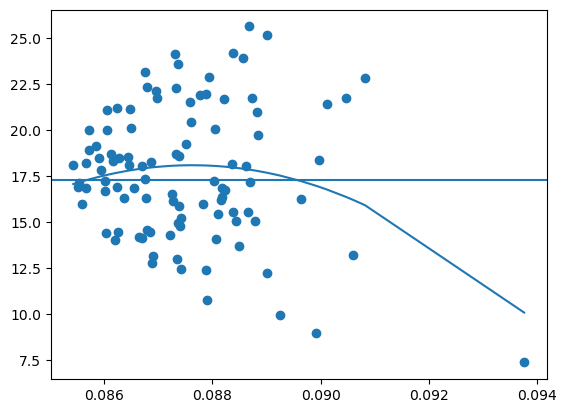

[ 251162.09859055 -499347.11975642  248193.33275788]
-0.5022977954134059
0.12474186141498067


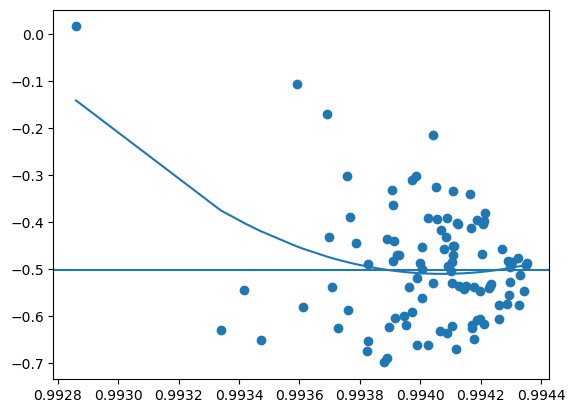

In [ ]:
import numpy as np
from modules import Polynomial, Model, apply_noise, nonline_fit, poly_fit, exponential1
import matplotlib.pyplot as plt

from sympy import init_printing

from modules.utils import concord, r_sq, rse

init_printing()


def data_model(val: int):
    return 2.2 * np.sin(0.01 * val)


p = 100
n = 400
N = n * 2
x = np.arange(n)
l = np.arange(n, N)
ideal_train = np.zeros(n)
for i in np.nditer(x):
    ideal_train[i] = data_model(i)
ideal_test = np.zeros(n)
for i, v in np.ndenumerate(l):
    ideal_test[i] = data_model(v)

p_rsq = np.zeros(p)
p_rse = np.zeros(p)
n_rsq = np.zeros(p)
n_rse = np.zeros(p)

for j in range(p):
    # ideal = exponential1()
    data_train = apply_noise(ideal_train, sigma=0.2)

    expr = "a0 + a1*t**2 + a2*sin(a3*t)"
    # expr = "a0 + a1*t + a2*exp(a3*t)"
    nonline, poly = nonline_fit(expr, "t", data_train, as_model=True)
    y_n = nonline.collapse(n, N - n)
    y_p = poly.collapse(x)

    p_rsq[j] = r_sq(ideal_train, y_p)
    p_rse[j] = rse(ideal_train, y_p)
    n_rsq[j] = r_sq(ideal_test, y_n)
    n_rse[j] = rse(ideal_test, y_n)

plt.scatter(p_rse, n_rse)
coeffs = np.polyfit(p_rse, n_rse, 2)
print(coeffs)
print(np.median(n_rse))
print(np.std(n_rse))
plt.plot(np.sort(p_rse), np.poly1d(coeffs)(np.sort(p_rse)))
plt.axhline(np.median(n_rse))
plt.show()
plt.scatter(p_rsq, n_rsq)
coeffs = np.polyfit(p_rsq, n_rsq, 2)
print(coeffs)
print(np.median(n_rsq))
print(np.std(n_rsq))
plt.plot(np.sort(p_rsq), np.poly1d(coeffs)(np.sort(p_rsq)))
plt.axhline(np.median(n_rsq))
plt.show()

880: 1.0
500: 2.5589574726862145
1480: 2.012734841460981
(array([ 2,  8, 17, 20, 24, 27, 32, 37, 40, 43, 46, 48, 52, 59, 61, 65, 68,
       74, 76, 82, 86]),)
90


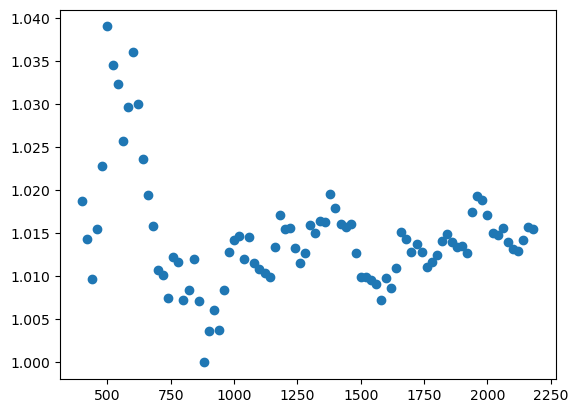

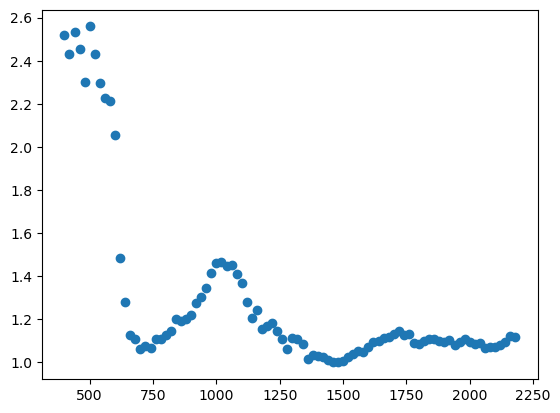

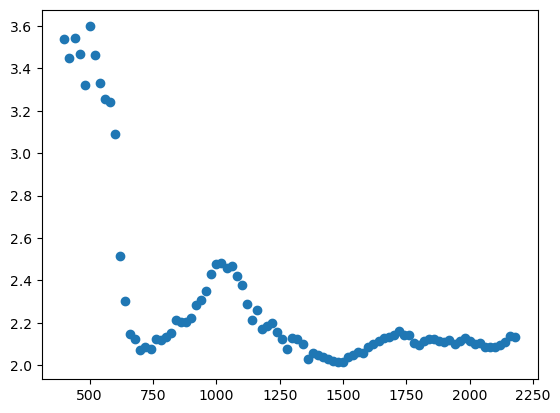

In [50]:
from modules import poly_fit, rse, r_sq, transcendental1
import matplotlib.pyplot as plt
import scipy as sc

# def data_model(val: int):
#     return 2.2 * np.sin(0.01 * val)


p_rse = []
p_rsq = []
sizes = []
data_o = apply_noise(transcendental1(2200), 0.1)

for size in range(400, 2200, 20):
    # data = np.zeros(size)
    data = data_o[0:size]
    # for i in np.arange(size):
    #     data[i] = data_model(i)
    data_y = poly_fit(data, 10)
    p_rse.append(rse(data, data_y))
    p_rsq.append(r_sq(data, data_y))
    sizes.append(size)
    
p_rse_min = np.min(p_rse)
p_rsq_max = np.max(p_rsq)
p_rse = np.array(p_rse) / p_rse_min
p_rsq = np.array(p_rsq) / p_rsq_max
p_rr = p_rse + p_rsq

for i, r in enumerate(p_rse):
    if r == np.min(p_rse):
        print(f"{sizes[i]}: {r}")
        break
for i, r in enumerate(p_rsq):
    if r == np.max(p_rsq):
        print(f"{sizes[i]}: {r}")
        break
for i, r in enumerate(p_rr):
    if r == np.min(p_rr):
        print(f"{sizes[i]}: {r}")
        break
    
print(sc.signal.argrelextrema(np.array(p_rse), np.less))
print(len(p_rse))
plt.scatter(sizes, p_rse)
plt.show()
plt.scatter(sizes, p_rsq)
plt.show()
plt.scatter(sizes, p_rr)
plt.show()

array([-0.47597836, -0.00528491,  1.93221861])

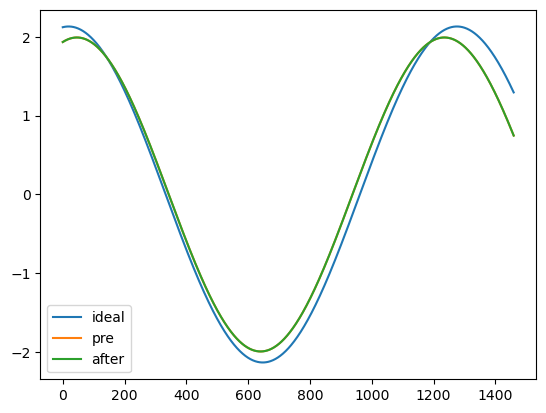

In [ ]:
from cProfile import label
from modules import Model, Polynomial, transcendental1, apply_noise
import sympy as sp
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

rank = 6
n = 1460
x = np.arange(n)
ideal = transcendental1(n)
data = apply_noise(ideal, sigma=1)

# Construct models
nonline: Model = Model("a0*sin(a1*t) + a2*cos(a1*t)", "t")
rank = nonline.rank if rank == 0 else rank
poly: Model = Polynomial(rank, "t")
poly_s: list[sp.Expr] = poly.spectrum(rank)

# Generate train x
x_train: np.ndarray = np.arange(data.size)
# Calculate polynomial coeffs
poly_c: np.ndarray = np.polyfit(x_train, data, rank)[::-1]
# # Calculate nonlinear coeffs
# for i, c in enumerate(poly.coeffs):
#     balance = balance.subs(c, poly_c[i])

# Solve balance
balance: list[sp.Eq] = []
for i, a in enumerate(nonline.spectrum(rank)):
    balance.append((a - poly_s[i]).subs(poly.coeffs[i], poly_c[i]))
    balance[i] = balance[i].subs(sp.abc.H, 1)

display(balance)

solution0 = sp.nonlinsolve(balance[: len(nonline.coeffs)], nonline.coeffs).args[0]
# solution0 = np.array(solution0).astype(np.float64)

display(solution0)

func = sp.lambdify(nonline.coeffs, balance, "scipy")

wrapper = lambda args: func(*args)

solution = sc.optimize.least_squares(wrapper, solution0, method="lm")

display(solution.x)

nonline.apply_trained(solution0)
y_pred1 = np.arange(n, dtype=np.float64)
with np.nditer(y_pred1, op_flags=["readwrite"]) as it:
    for value in it:
        value[...] = nonline.collapse(value)
nonline.apply_trained(solution.x)
y_pred2 = np.arange(n, dtype=np.float64)
with np.nditer(y_pred2, op_flags=["readwrite"]) as it:
    for value in it:
        value[...] = nonline.collapse(value)

plt.plot(x, ideal, label="ideal")
plt.plot(x, y_pred1, label="pre")
plt.plot(x, y_pred2, label="after")
plt.legend()
plt.show()

Model rank was raised to 6


'Train:'

Poly RSE 0.06632396349024422
Poly Rsq 0.99800531434859
Poly Rsq 1.4835374376815342
Nonline RSE 0.036141854229961475
Nonline Rsq 0.9994028028003326
Nonline Std 1.4774636994533932


'Test:'

Poly RSE 148.21117546922517
Poly Rsq -0.6443865546039527
Poly Rsq 115.46337925293291
Nonline RSE 0.0673685580364852
Nonline Rsq 0.9982754817389383
Nonline Std 1.6206477240714812


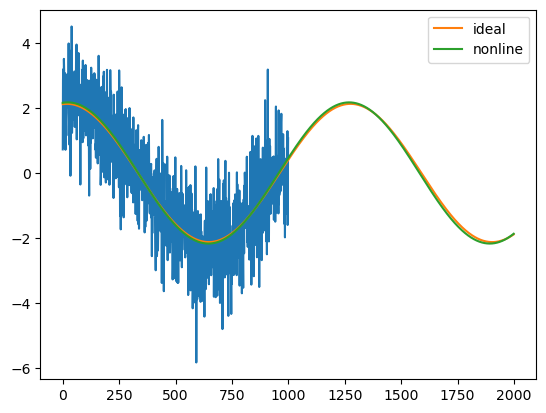

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from modules import transcendental1, apply_noise, nonline_fit, rse, r_sq

n = 1000
N = n*2
x = np.arange(n)
l = np.arange(N)
ideal = transcendental1(n)
data = apply_noise(ideal, sigma=1)
ideal = transcendental1(n*2)
nonline, poly = nonline_fit("a0*sin(a1*t) + a2*cos(a1*t)", "t", data, as_model=True, raise_rank=True, numeric=True)
y_n = nonline.collapse(l)
y_p = poly.collapse(l)

display("Train:")
print(f"Poly RSE {rse(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {r_sq(ideal[0:n], y_p[0:n])}")
print(f"Poly Rsq {np.std(y_p[0:n])}")
print(f"Nonline RSE {rse(ideal[0:n], y_n[0:n])}")
print(f"Nonline Rsq {r_sq(ideal[0:n], y_n[0:n])}")
print(f"Nonline Std {np.std(y_n[0:n])}")
display("Test:")
print(f"Poly RSE {rse(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {r_sq(ideal[n:N], y_p[n:N])}")
print(f"Poly Rsq {np.std(y_p[n:N])}")
print(f"Nonline RSE {rse(ideal[n:N], y_n[n:N])}")
print(f"Nonline Rsq {r_sq(ideal[n:N], y_n[n:N])}")
print(f"Nonline Std {np.std(y_n[n:N])}")

plt.plot(x, data)
plt.plot(l, ideal, label="ideal")
# plt.plot(l, y_p, label="poly")
plt.plot(l, y_n, label="nonline")
plt.legend()
plt.show()

{np.float64(0.4548613251963592): 4,
 np.float64(0.4566958782213295): 5,
 np.float64(0.45588035203888927): 6,
 np.float64(0.45527187035475636): 7,
 np.float64(0.45611367006748577): 8,
 np.float64(0.45597688048413065): 9,
 np.float64(0.45593898048451625): 10,
 np.float64(0.4551960921220635): 11,
 np.float64(0.4544689441532234): 12}

5

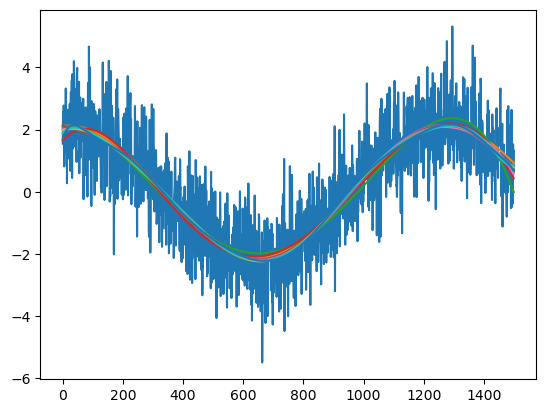

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from modules import transcendental1, apply_noise, poly_fit, rse, r_sq, concord

n = 1500
x = np.arange(n)
ideal = transcendental1(n)
data = apply_noise(ideal, sigma=1)

plt.plot(x, data)
plt.plot(x, ideal)

rank = 3
rank_rse = {}
for _ in range(1, 10):
    rank += 1
    data_y = poly_fit(data, rank)
    plt.plot(x, data_y)
    rank_rse[concord(data, data_y) / np.std(data)] = rank
display(rank_rse)
display(rank_rse[np.max(list(rank_rse.keys()))])
plt.show()

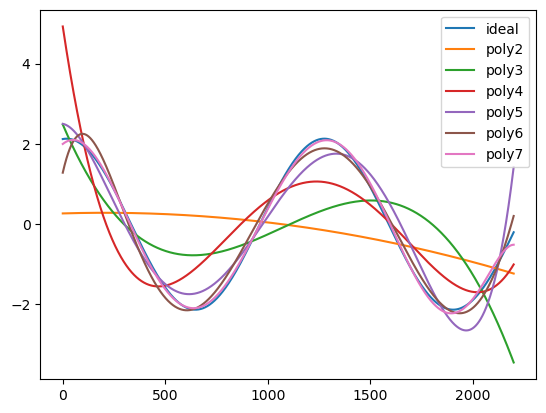

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from modules import transcendental1, apply_noise, poly_fit, rse, r_sq, concord

n = 2200
x = np.arange(n)
ideal = transcendental1(n)
plt.plot(x, ideal, label="ideal")

rank = 2
for _ in range(1, 7):
    data_y = poly_fit(ideal, rank)
    plt.plot(x, data_y, label=f"poly{rank}")
    rank += 1
    
plt.legend()
plt.show()